In [1]:
import pandas as pd
import numpy as np
from sklearn. impute import KNNImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('../data/cannabis2.xlsx')
#df = pd.read_excel('../data/cannabis.xlsx', sheet_name=1, usecols='H:R', skiprows=2)

df.head()

,Vastaus-ID,Lähetys päivämäärä,Viimeinen sivu,Aloituskieli,Siemen,Aloituspäivämäärä,Viimeisimmän toiminteen päivämäärä,"Olen perillä tutkimuksesta ja tavasta, jolla henkilötietojani käsitellään. Ymmärrän, että osallistuminen on vapaaehtoista. Ymmärrän myös, että voin lopettaa tutkimukseen osallistumisen milloin tahansa. Suostun osallistumaan tutkimukseen ja hyväksyn henkilötietojeni, mukaan lukien terveystietojen, käsittelyn tätä tutkimusta varten tiedotteessa ja tietosuojaselosteessa kuvatulla tavalla. Suostun myös vastauksiini perustuvan aineiston arkistoinnin Tietoarkistoon ja jatkokäyttöön tieteellisessä tutkimuksessa. Olen 18-vuotias tai vanhempi",Asutko Suomessa?,city,...,"Arvio kuinka samaa tai eri mieltä olet kustakin väittämästä. Arvot: 1 = Täysin eri mieltä, 10 = Täysin samaa mieltä [Kannabis vähentää kohtauksia]","Arvio kuinka samaa tai eri mieltä olet kustakin väittämästä. Arvot: 1 = Täysin eri mieltä, 10 = Täysin samaa mieltä [Kannabis on reseptilääkkeiden korvike]","Arvio kuinka samaa tai eri mieltä olet kustakin väittämästä. Arvot: 1 = Täysin eri mieltä, 10 = Täysin samaa mieltä [Kannabis on alkoholin korvike]","Arvio kuinka samaa tai eri mieltä olet kustakin väittämästä. Arvot: 1 = Täysin eri mieltä, 10 = Täysin samaa mieltä [Kannabis parantaa syöpää]",anxiety,anxious,concern,want_to_stop,"Esimerkiksi mitä ovat ne toivotut vaikutukset, joita saat kannabiksen käytöstäsi? Entä ei-toivotut vaikutukset?","Haluatko antaa palautetta tästä kyselystä? Voit kirjoittaa vastauksesi vapaasti alla olevaan kenttään. Vältä edelleen kuitenkin sellaisten tietojen antamista, joiden kautta olisit tunnistettavissa (esim. nimi, asuinpaikka, työpaikka)."
0,1,2024-04-04 22:13:44,12,fi,733433875,2024-04-04 21:57:53,2024-04-04 22:13:44,Kyllä,Kyllä,"Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kau...",...,8,9,9,10,En koskaan tai erittäin harvoin,Joskus,Joskus,Joskus,NaN,NaN
1,3,2024-04-05 08:34:48,12,fi,793473945,2024-04-05 08:04:01,2024-04-05 08:34:48,Kyllä,Kyllä,Pienempi kaupunki,...,10,7,10,5,En koskaan tai erittäin harvoin,Ei koskaan tai erittäin harvoin,En koskaan tai erittäin harvoin,En koskaan tai erittäin harvoin,Hyvät yöunet ja pystyy rauhottua eikä stressaa...,NaN
2,4,2024-04-05 08:21:01,12,fi,1573751830,2024-04-05 08:04:10,2024-04-05 08:21:01,Kyllä,Kyllä,Maaseudun asutuskeskus tai taajama,...,10,10,10,10,En koskaan tai erittäin harvoin,Joskus,Joskus,En koskaan tai erittäin harvoin,Ei semmosia juurikaan ole. Asenne kysymys.,Toivottavasti tämmöisten kyselyiden vastaukset...
3,5,2024-04-05 08:32:46,12,fi,852495860,2024-04-05 08:15:48,2024-04-05 08:32:46,Kyllä,Kyllä,Muu yli 100 000 asukkaan kaupunki,...,10,5,10,8,En koskaan tai erittäin harvoin,Joskus,En koskaan tai erittäin harvoin,En koskaan tai erittäin harvoin,Bediol ollut paras leikkaamaan pahimman kivun ...,NaN
4,6,2024-04-05 09:30:20,12,fi,964294943,2024-04-05 08:23:53,2024-04-05 09:30:20,Kyllä,Kyllä,Muu yli 100 000 asukkaan kaupunki,...,10,8,10,10,Joskus,Usein,Joskus,Joskus,olen poltellut noin 15 vuotta ja kannabis rent...,hyvä kysely


In [3]:
# Define the list of columns to keep
columns_to_keep = ['city', 'age', 'gender', 'education', 'outcome', 'onset', 'employment',
                   'cannabis_type', 'cannabis_source', 'monthly_usage', 'amount', 
                   'way_of_usage', 'thc', 'thc_cbd', 'monthly_cost', 'economic_worry', 
                   'anxiety', 'anxious', 'concern', 'want_to_stop']

# Keep only the specified columns in the DataFrame
df = df[columns_to_keep]
df.head()


,city,age,gender,education,outcome,onset,employment,cannabis_type,cannabis_source,monthly_usage,amount,way_of_usage,thc,thc_cbd,monthly_cost,economic_worry,anxiety,anxious,concern,want_to_stop
0,"Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kau...",47,Mies,Ylioppilastutkinto,Käytän kannabista useimmiten itse-lääkinnällis...,14,En halua vastata,Kannabiskukka,Saan sen ystävältä tai sukulaiselta,20.0,"0,6 - 1,0",Poltan kannabista tupakan kanssa (jointti),En tiedä,Paljon,0.0,Vähän,En koskaan tai erittäin harvoin,Joskus,Joskus,Joskus
1,Pienempi kaupunki,19,Mies,Ammatillinen tutkinto,Käytän kannabista toisinaan itse-lääkinnällisi...,15,Kokoaikainen,Kannabiskukka,Katukauppias/diileri,30.0,"0,6 - 1,0",Poltan kannabista puhtaana (ilman tupakkaa),Paljon,Paljon,200.0,Vähän,En koskaan tai erittäin harvoin,Ei koskaan tai erittäin harvoin,En koskaan tai erittäin harvoin,En koskaan tai erittäin harvoin
2,Maaseudun asutuskeskus tai taajama,36,Nainen,Ammatillinen tutkinto,Käytän kannabista useimmiten itse-lääkinnällis...,20,Osa-aikainen,Kannabiskukka,Saan sen ystävältä tai sukulaiselta,15.0,"2,6 - 3,0",Poltan kannabista tupakan kanssa (jointti),Vähän,Keskimääräisesti,400.0,Jonkin verran,En koskaan tai erittäin harvoin,Joskus,Joskus,En koskaan tai erittäin harvoin
3,Muu yli 100 000 asukkaan kaupunki,38,Mies,Ammatillinen tutkinto,Käytän kannabista useimmiten itse-lääkinnällis...,14,Kokoaikainen,Kannabiskukka,Saan sen ystävältä tai sukulaiselta,30.0,"1,6 - 2,0",Höyrystän/vaporisoin kannabista (kukkaa),Vähän,Paljon,400.0,Vähän,En koskaan tai erittäin harvoin,Joskus,En koskaan tai erittäin harvoin,En koskaan tai erittäin harvoin
4,Muu yli 100 000 asukkaan kaupunki,38,Mies,Ammatillinen tutkinto,Käytän kannabista useimmiten itse-lääkinnällis...,19,Osa-aikainen,Kannabiskukka,Saan sen ystävältä tai sukulaiselta,29.0,"0,6 - 1,0",Poltan kannabista puhtaana (ilman tupakkaa),Keskimääräisesti,Paljon,300.0,Vähän,Joskus,Usein,Joskus,Joskus


In [4]:
# dimensio of the data
df.shape

(537, 20)

#### How many missing values?

In [5]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [6]:
missing_values_table(df)
# Good!, only one variable has missing value and it is very small

Your selected dataframe has 20 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
monthly_cost,7,1.3


## Gender

<Axes: xlabel='gender'>

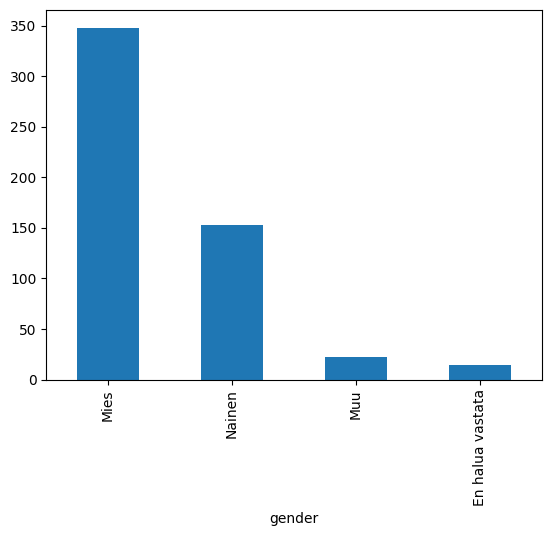

In [7]:

df.gender.value_counts(dropna=False).plot(kind='bar')

In [8]:
df.gender.value_counts(dropna=False)

gender
Mies                348
Nainen              153
Muu                  22
En halua vastata     14
Name: count, dtype: int64

In [9]:
# Create a mapping dictionary for the gender column
# the idea is to create a binary format and males will be reference category
gender_mapping = {
    'Mies': 'M',
    'Nainen': 'F+ others',
    'Muu': 'F+ others',
    'En halua vastata': 'F+ others' # keep in mind that this group is merged with Muu!
}

# Apply the mapping to the gender column
df['gender'] = df['gender'].map(gender_mapping)

df.gender.value_counts(dropna=False)

gender
M            348
F+ others    189
Name: count, dtype: int64

## Age

age
40    29
45    26
26    22
43    22
33    21
24    20
39    20
29    18
37    18
34    16
28    14
30    13
27    13
21    13
35    13
22    13
42    13
32    12
46    12
23    12
20    12
31    12
50    11
44    11
48    11
38    11
25    11
36    11
47    10
49    10
53     9
55     8
41     8
62     6
19     6
51     6
52     5
54     5
59     4
18     4
58     3
57     3
67     3
60     3
63     3
69     2
56     2
65     2
68     1
64     1
70     1
73     1
61     1
Name: count, dtype: int64


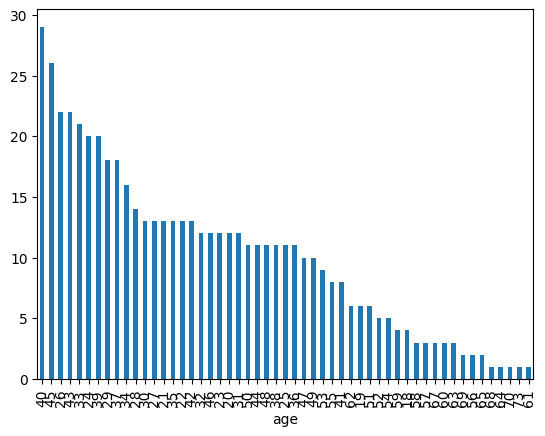

In [10]:
df.age.value_counts(dropna=False).plot(kind='bar')
print(df.age.value_counts(dropna=False))

In [11]:
# Get the minimum and maximum values in the age column
min_age = df['age'].min()
max_age = df['age'].max()

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 73


In [12]:
# we will use age as continues variable but just in case if we need categorical format

# Age categories
#Young Adults: 18-29
#Early 30s: 30-34
#Mid 30s: 35-39
#Mid 40s: 40-49
#50s or More: 50 and above




# Define the bins and labels
#bins = [17, 29, 34, 39, 49, df['age'].max()]  # Adjust the max age to cover all data
#labels = ['Young Adults', 'Early 30s', 'Mid 30s', 'Mid 40s', '50s or More']


# New categories based on Aleksi suggestions
# Age categories
#Young Adults: 18-29
#Mid 30s: 30-39
#Mid 40s: 40-49
#50s or More: 50 and above

# Define the bins and labels
bins = [17, 29, 39, 49, df['age'].max()]  # Adjust the max age to cover all data
labels = ['Young Adults', 'Mid 30s', 'Mid 40s', '50s or More']

# Create a new column with age categories
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

#df.age_category.value_counts(dropna=False).plot(kind='bar')


## Education

<Axes: xlabel='education'>

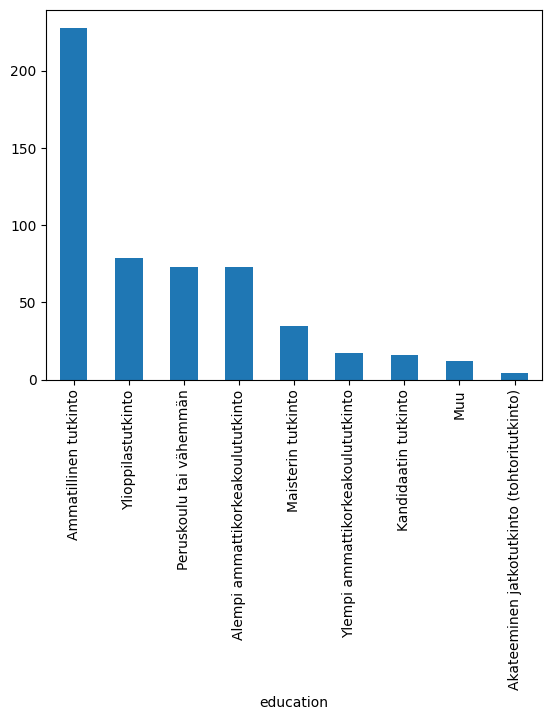

In [13]:
df.education.value_counts(dropna=False).plot(kind='bar')

In [14]:
df.education.value_counts(dropna=False)

education
Ammatillinen tutkinto                          228
Ylioppilastutkinto                              79
Peruskoulu tai vähemmän                         73
Alempi ammattikorkeakoulututkinto               73
Maisterin tutkinto                              35
Ylempi ammattikorkeakoulututkinto               17
Kandidaatin tutkinto                            16
Muu                                             12
Akateeminen jatkotutkinto (tohtoritutkinto)      4
Name: count, dtype: int64

In [15]:
## Aleksi Notes
# Primary and lower secondary education or less (peruskoulu tai vähemmän)
#Upper secondary education (ammatillinen tutkinto AND ylioppilastutkinto)
#Higher education (alempi ammattikorkeakoulututkinto/Kandidaatin tutkinto/Maisterin tutkinto/Ylempi ammattikorkeakoulututkinto/Akateeminen jatkotutkinto (tohtoritutkinto)
                  

df['educationmap'] = df.education.map({
    'Ammatillinen tutkinto': 'Vocational Upper secondary',
    'Peruskoulu tai vähemmän':'Elementary school or less',
    'Ylioppilastutkinto': 'Regular Upper secondary',
    'Alempi ammattikorkeakoulututkinto': 'Higher Education',  
    'Muu': 'Elementary school or less',
    'Ylempi ammattikorkeakoulututkinto': 'Higher Education',
    'Akateeminen jatkotutkinto (tohtoritutkinto)': 'Higher Education',
    'Maisterin tutkinto': 'Higher Education',
    'Kandidaatin tutkinto': 'Higher Education'  # 
})

#df.educationmap.value_counts(dropna=False).plot(kind='bar')

# if we could split Upper secondary again if it is meaningful, it might be better!

<Axes: xlabel='education_level'>

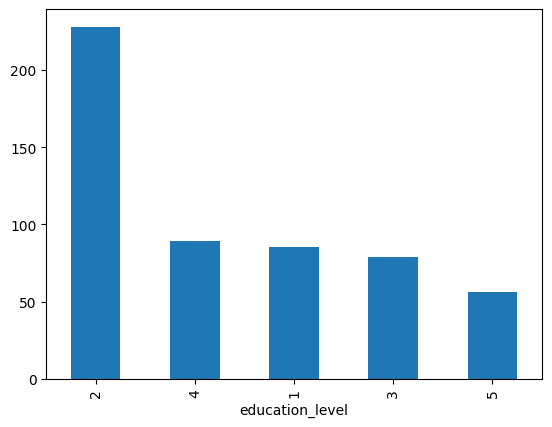

In [16]:
# where are going to use this one

df['education_level'] = df.education.map({
    'Ammatillinen tutkinto': 2, 
    'Peruskoulu tai vähemmän': 1,
    'Ylioppilastutkinto': 3,
    'Alempi ammattikorkeakoulututkinto': 4 ,
    'Muu':  1,
    'Ylempi ammattikorkeakoulututkinto':  5,
    'Akateeminen jatkotutkinto (tohtoritutkinto)': 5,
    'Maisterin tutkinto': 5,
'Kandidaatin tutkinto':  4
})

df.education_level.value_counts(dropna=False).plot(kind='bar')


## city

<Axes: xlabel='city'>

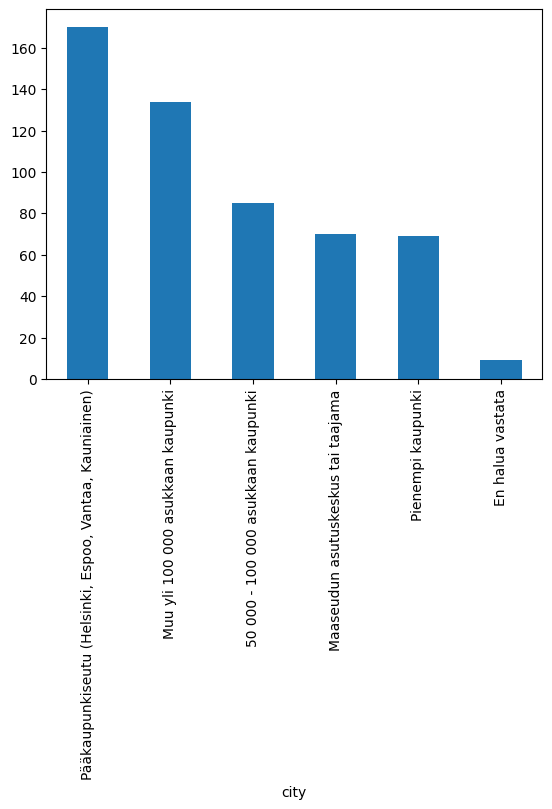

In [17]:
df.city.value_counts(dropna= False).plot(kind='bar')

In [18]:
df.city.value_counts(dropna= False)

city
Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kauniainen)    170
Muu yli 100 000 asukkaan kaupunki                         134
50 000 - 100 000 asukkaan kaupunki                         85
Maaseudun asutuskeskus tai taajama                         70
Pienempi kaupunki                                          69
En halua vastata                                            9
Name: count, dtype: int64

<Axes: xlabel='citymap'>

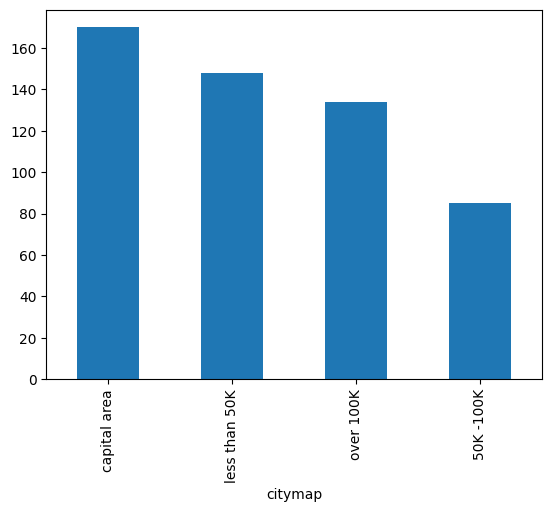

In [19]:
df['citymap'] = df.city.map({
    'Muu yli 100 000 asukkaan kaupunki': 'over 100K',
    '50 000 - 100 000 asukkaan kaupunki':'50K -100K',
    'Pienempi kaupunki': 'less than 50K',
    'Pääkaupunkiseutu (Helsinki, Espoo, Vantaa, Kauniainen)': 'capital area',
    'Maaseudun asutuskeskus tai taajama':'less than 50K',
    'Muu maaseutu':'less than 50K',
    'En halua vastata': 'less than 50K' # people who do not respond converted to less then 50K?
})

df.citymap.value_counts(dropna= False).plot(kind='bar')

<Axes: xlabel='citymap'>

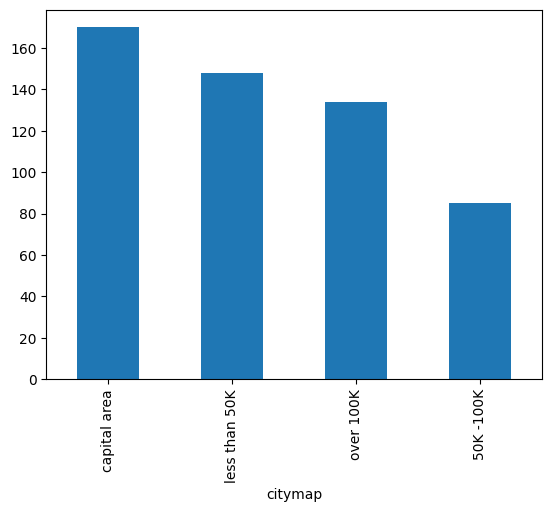

In [20]:
#a  = SeriesImputer()             # Initialize the imputer
#a.fit(df['citymap'])              # Fit the imputer
#df['citymap'] = a.transform(df['citymap'])   # Get a new series
df.citymap.value_counts(dropna=False).plot(kind='bar')

<Axes: xlabel='city_ordinal'>

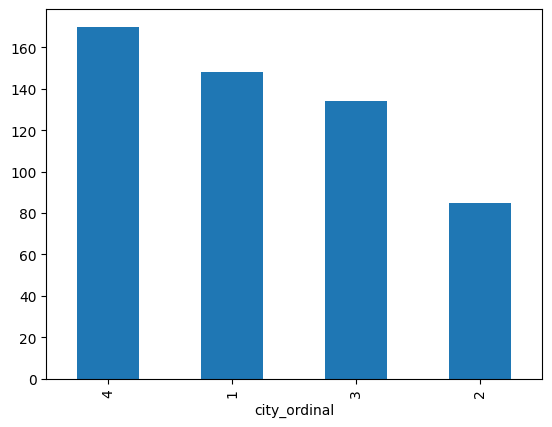

In [21]:
df['city_ordinal'] = df.citymap.map({
    'capital area': '4',
    'over 100K':'3',
    '50K -100K': '2',
    'less than 50K': '1',
})

df['city_ordinal'] = pd.to_numeric(df['city_ordinal'])


df.city_ordinal.value_counts(dropna= False).plot(kind='bar')

## Onset age

<Axes: xlabel='onset'>

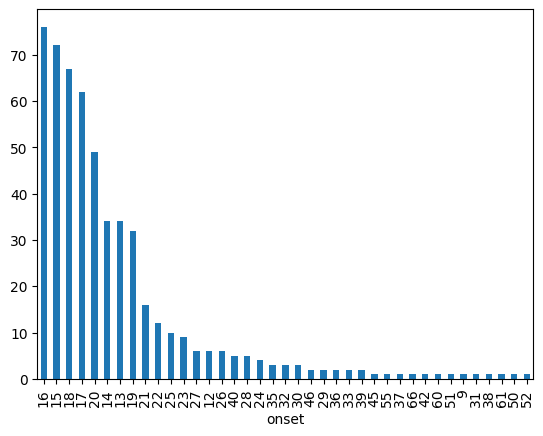

In [22]:
df.onset.value_counts(dropna=False).plot(kind='bar')

In [23]:
# Get the minimum and maximum values in the onset column
min_onset = df['onset'].min()
max_onset = df['onset'].max()

# Print the results
print(f"Minimum onset: {min_onset}")
print(f"Maximum onset: {max_onset}")


Minimum onset: 9
Maximum onset: 66


In [24]:
df['onset'].describe()

count    537.000000
mean      18.992551
std        6.945412
min        9.000000
25%       15.000000
50%       17.000000
75%       20.000000
max       66.000000
Name: onset, dtype: float64

# Employment

I merged En halua vastaa with Muu

employment
Kokoaikainen         188
Työtön                83
Opiskelija            72
Osa-aikainen          68
Työkyvytön/sairas     68
Eläkkeellä            50
En halua vastata       8
Name: count, dtype: int64

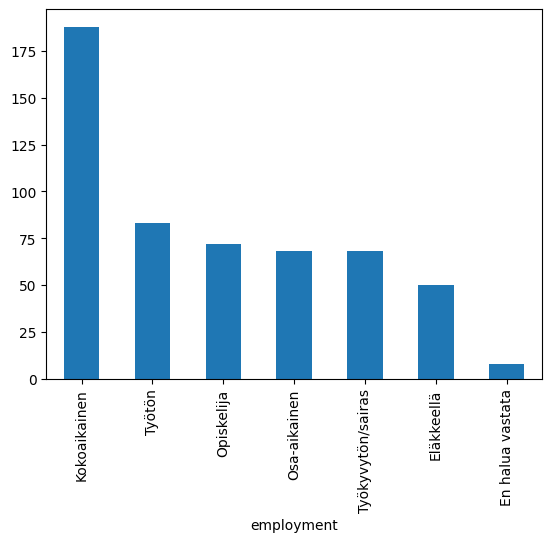

In [25]:
df.employment.value_counts(dropna=False).plot(kind='bar')
df.employment.value_counts(dropna=False)

employment
Full-time        188
Unemployed        83
Student           72
Part-time         68
Disabled/Sick     68
Retired           50
Other              8
Name: count, dtype: int64

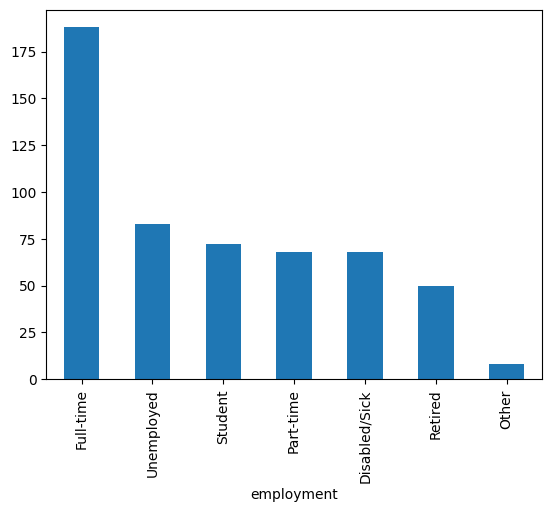

In [26]:

# Translation and merging mapping
translation_mapping = {
    'Kokoaikainen': 'Full-time',
    'Työtön': 'Unemployed',
    'Opiskelija': 'Student',
    'Työkyvytön/sairas': 'Disabled/Sick',
    'Osa-aikainen': 'Part-time',
    'Muu': 'Other',
    'Eläkkeellä': 'Retired',
    'En halua vastata': 'Other'  # Merge 'En halua vastata' with 'Muu' by mapping to 'Other'
}

# Apply the mapping to the 'employment' column
df['employment'] = df['employment'].map(translation_mapping)

df.employment.value_counts(dropna=False).plot(kind='bar')
df.employment.value_counts(dropna=False)



In [27]:
df.employment.value_counts(dropna=False)

employment
Full-time        188
Unemployed        83
Student           72
Part-time         68
Disabled/Sick     68
Retired           50
Other              8
Name: count, dtype: int64

employment2
Employed                  328
Not in paid employment    209
Name: count, dtype: int64

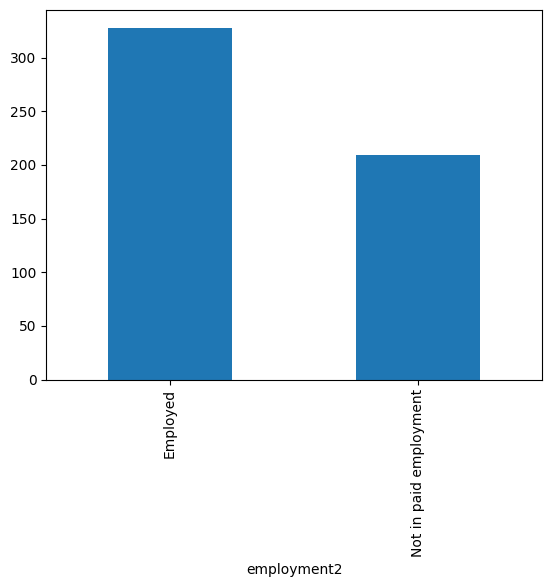

In [28]:
#1. Employed (Full time/part time/student) which is the reference category 
#2. Not in paid employment (Retired/ Disabled/Sick/Unemployed)


# Translation and merging mapping
translation_mapping = {
    'Full-time': 'Employed',
    'Unemployed': 'Not in paid employment',
    'Student': 'Employed',
    'Disabled/Sick': 'Not in paid employment',
    'Other': 'Not in paid employment', # check!
    'Part-time': 'Employed',
    'Retired': 'Not in paid employment'
}

# Apply the mapping to the 'employment' column
df['employment2'] = df['employment'].map(translation_mapping)

df.employment2.value_counts(dropna=False).plot(kind='bar')
df.employment2.value_counts(dropna=False)



## Montly use

<Axes: xlabel='monthly_usage'>

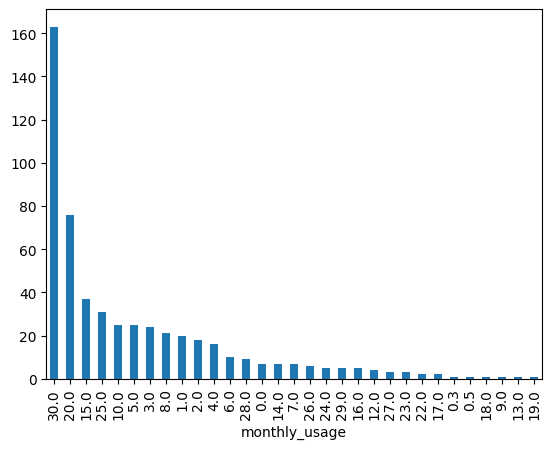

In [29]:
df.monthly_usage.value_counts(dropna=False).plot(kind='bar')

In [30]:
import pandas as pd

# Define the bins and labels for the categories
bins = [0, 4, 10, 20, 29, 30]
labels = ['Low Usage', 'Moderate Usage', 'Frequent Usage', 'Very Frequent Usage', 'Daily Usage']

# Create a new column with monthly usage categories
df['usage_category'] = pd.cut(df['monthly_usage'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the distribution of the new categories
print(df['usage_category'].value_counts())


usage_category
Daily Usage            163
Frequent Usage         134
Moderate Usage          89
Low Usage               87
Very Frequent Usage     64
Name: count, dtype: int64


**Proposed Categories:**

- Low Usage: 0-4 days per month 
- Moderate Usage: 5-10 days per month
- Frequent Usage: 11-20 days per month
- Very Frequent Usage: 21-29 days per month
- Daily Usage: 30 days per month

<Axes: xlabel='usage_category'>

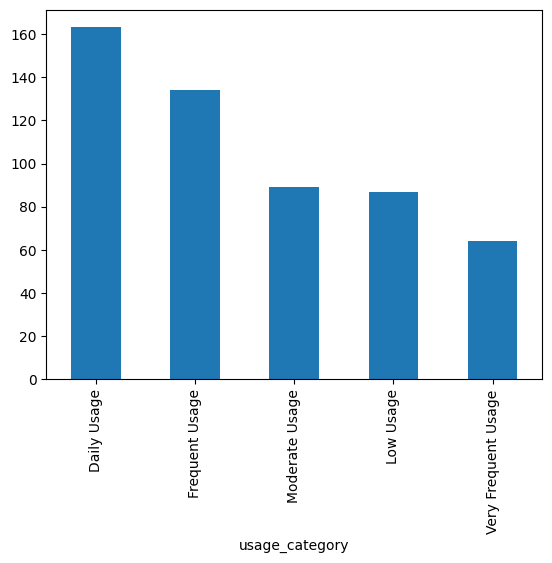

In [31]:
df.usage_category.value_counts().plot(kind='bar')

In [32]:
# Define the ordinal mapping
ordinal_mapping = {
    'Low Usage': 1,
    'Moderate Usage': 2,
    'Frequent Usage': 3,
    'Very Frequent Usage': 4,
    'Daily Usage': 5
}

# Map the categories to the ordinal values
df['usage_ordinal'] = df['usage_category'].map(ordinal_mapping)

# Display the first few rows to verify
print(df[['monthly_usage', 'usage_category', 'usage_ordinal']].head())


   monthly_usage       usage_category usage_ordinal
0           20.0       Frequent Usage             3
1           30.0          Daily Usage             5
2           15.0       Frequent Usage             3
3           30.0          Daily Usage             5
4           29.0  Very Frequent Usage             4


<Axes: xlabel='usage_ordinal'>

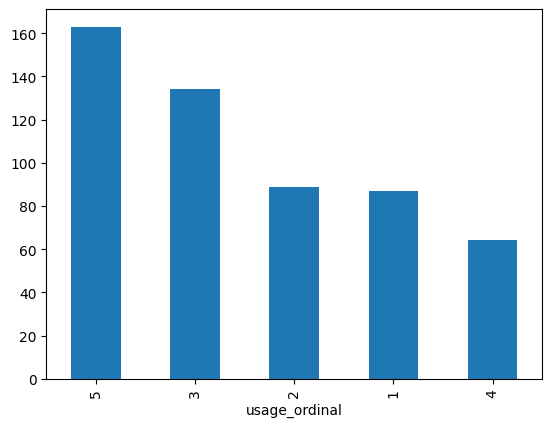

In [33]:
df.usage_ordinal.value_counts().plot(kind='bar')

## Amount

amount
0,1 - 0,5           247
0,6 - 1,0           132
1,1 - 1,5            53
Alle 0,1 grammaa     37
1,6 - 2,0            30
Yli 3 grammaa        16
2,1 - 2,5            12
2,6 - 3,0            10
Name: count, dtype: int64


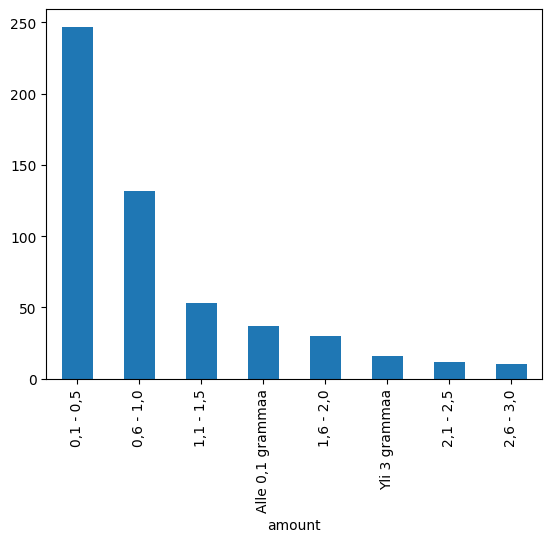

In [34]:
df.amount.value_counts(dropna=False).plot(kind='bar')
print(df.amount.value_counts(dropna=False))

   amount_category  amount_ordinal
0  0,6 - 1,0 grams               3
1  0,6 - 1,0 grams               3
2  2,6 - 3,0 grams               7
3  1,6 - 2,0 grams               5
4  0,6 - 1,0 grams               3


<Axes: xlabel='amount_ordinal'>

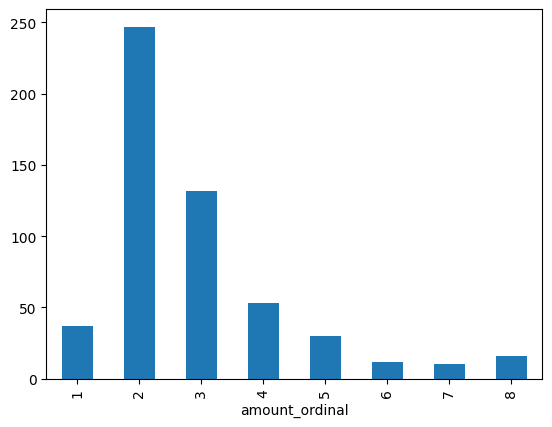

In [35]:
import pandas as pd

# Define the mapping for the amount categories with cutoff points as labels
amount_mapping = {
    '0,1 - 0,5': '0,1 - 0,5 grams',
    '0,6 - 1,0': '0,6 - 1,0 grams',
    '1,1 - 1,5': '1,1 - 1,5 grams',
    'Alle 0,1 grammaa': 'Less than 0,1 grams',
    '1,6 - 2,0': '1,6 - 2,0 grams',
    'Yli 3 grammaa': 'More than 3 grams',
    '2,1 - 2,5': '2,1 - 2,5 grams',
    '2,6 - 3,0': '2,6 - 3,0 grams'
}

# Apply the mapping to the amount column
df['amount_category'] = df['amount'].map(amount_mapping)

# Define the ordinal mapping based on the amount categories
ordinal_mapping = {
    'Less than 0,1 grams': 1,
    '0,1 - 0,5 grams': 2,
    '0,6 - 1,0 grams': 3,
    '1,1 - 1,5 grams': 4,
    '1,6 - 2,0 grams': 5,
    '2,1 - 2,5 grams': 6,
    '2,6 - 3,0 grams': 7,
    'More than 3 grams': 8
}

# Apply the ordinal mapping to create the amount_ordinal variable
df['amount_ordinal'] = df['amount_category'].map(ordinal_mapping)

# Display the first few rows to verify
print(df[['amount_category', 'amount_ordinal']].head())

# Optionally, plot the distribution of the amount_ordinal
df['amount_ordinal'].value_counts().sort_index().plot(kind='bar')


amount_category
0,1 - 0,5 grams        247
0,6 - 1,0 grams        132
1,1 - 1,5 grams         53
Less than 0,1 grams     37
1,6 - 2,0 grams         30
More than 3 grams       16
2,1 - 2,5 grams         12
2,6 - 3,0 grams         10
Name: count, dtype: int64


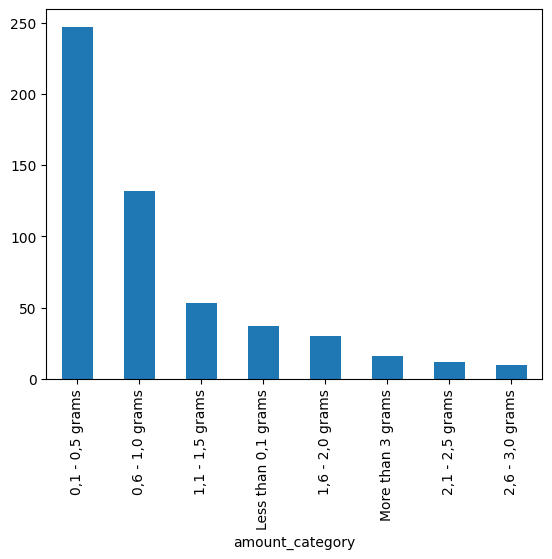

In [36]:
# Display the distribution of the new categories
df['amount_category'].value_counts().plot(kind='bar')
print(df['amount_category'].value_counts())

# Cannabis type

cannabis_type
Kannabiskukka                                               471
Kannabisöljy                                                 25
Muu                                                          17
Kannabisuute (ekstrakti)                                     12
Hasis                                                         9
Iholle voideltavat kannabistuotteet, kuten voide/emulsio      3
Name: count, dtype: int64


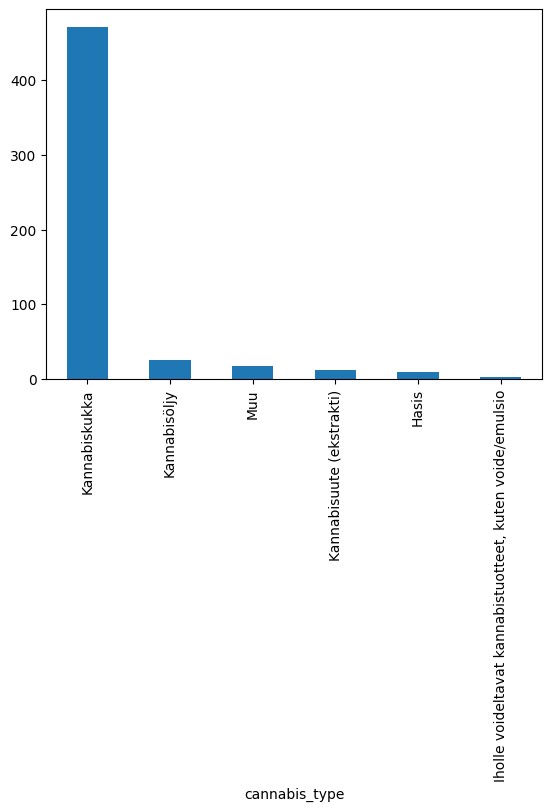

In [37]:
df['cannabis_type'].value_counts().plot(kind='bar')
print(df['cannabis_type'].value_counts())

# explanations
# Iholle voideltavat kannabistuotteet, kuten voide/emulsio  = Cannabis products applied to the skin, such as cream/emulsion


**Note:** The distribution of other categories are soo small, I think the only way is to make this variable as binary format. What do you think?

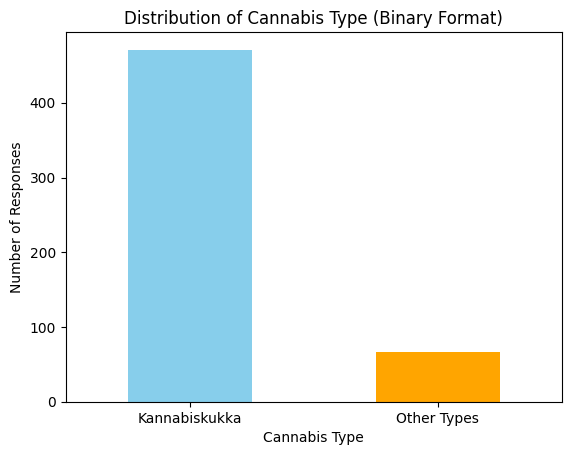

cannabis_type_binary
0    471
1     66
Name: count, dtype: int64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Map the cannabis_type variable to binary format
df['cannabis_type_binary'] = df['cannabis_type'].map({
    'Kannabiskukka': 0,
    'Kannabisöljy': 1,
    'Muu': 1,
    'Kannabisuute (ekstrakti)': 1,
    'Hasis': 1,
    'Iholle voideltavat kannabistuotteet, kuten voide/emulsio': 1
})

# Plot the results
df['cannabis_type_binary'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Cannabis Type')
plt.ylabel('Number of Responses')
plt.title('Distribution of Cannabis Type (Binary Format)')
plt.xticks(ticks=[0, 1], labels=['Kannabiskukka', 'Other Types'], rotation=0)
plt.show()

# Display the distribution in numbers
print(df['cannabis_type_binary'].value_counts())


# Way of Cannabis Usage

way_of_usage
Poltan kannabista tupakan kanssa (jointti)     201
Höyrystän/vaporisoin kannabista (kukkaa)       147
Poltan kannabista puhtaana (ilman tupakkaa)     95
Syön tai juon sen                               42
Laitan kannabisöljyä kieleni alle               26
Höyrystän/vaporisoin kannabisöljyä/uutetta      10
Poltan kannabista tupakan kanssa (bongi)         7
Muu                                              5
Käytän kannabisvoidetta iholleni                 2
Höyrystän/vaporisoin kannabista (hasis)          1
Poltan kannabista tupakan kanssa (Bongi)         1
Name: count, dtype: int64


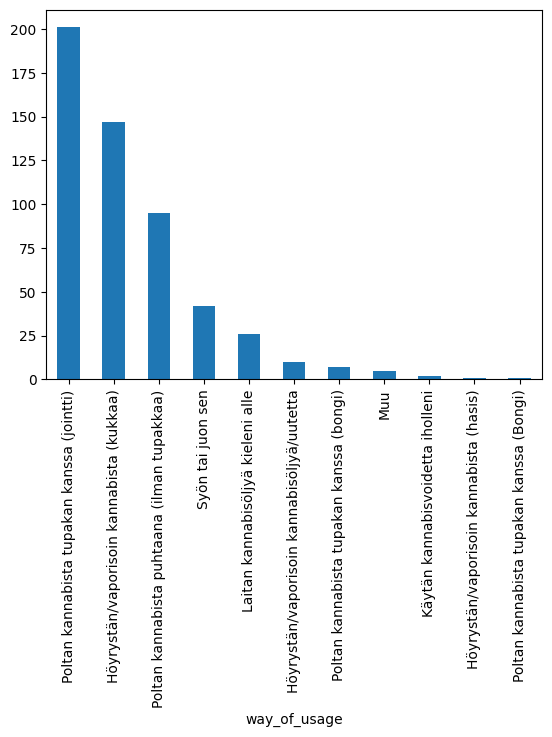

In [39]:
df['way_of_usage'].value_counts().plot(kind='bar')
print(df['way_of_usage'].value_counts())

# Käytän kannabisvoidetta iholleni = I use cannabis cream on my skin

usage_type
Smoke_with_tobacco    209
Vaporize_flower       158
Smoke_pure             95
Eat_or_drink           68
Other                   7
Name: count, dtype: int64


<Axes: xlabel='usage_type'>

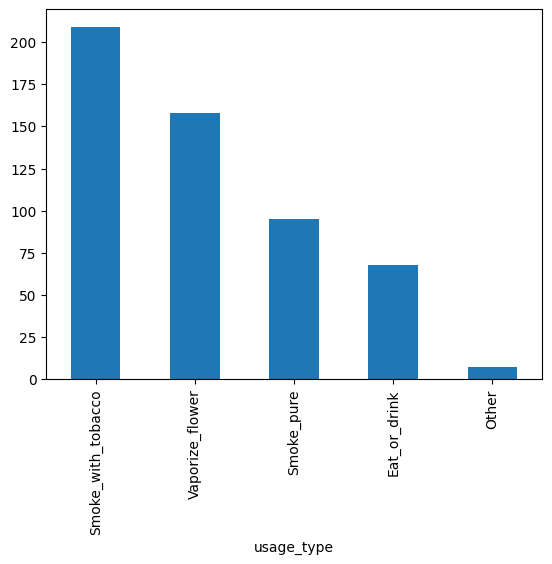

In [40]:
#1.
# 'Poltan kannabista tupakan kanssa (jointti)': 'Smoke_with_tobacco',
 #'Poltan kannabista tupakan kanssa (Bongi)': 'Smoke_with_tobacco
#'Poltan kannabista tupakan kanssa (bongi)': 'Smoke_with_tobacco'

#2. Poltan kannabista puhtaana (ilman tupakkaa)': 'Smoke_pure',

#I think the below categories should be under Vaporize (we can explain it 
#means vaporizing flower, hash and oil):

 #3. 'Höyrystän/vaporisoin kannabista (kukkaa)': 'Vaporize_flower',
#  'Höyrystän/vaporisoin kannabista (hasis)':'Smoke_pure',  
# 'Höyrystän/vaporisoin kannabisöljyä/uutetta': 'Oil', 
    
 # 4. 'Syön tai juon sen': 'Eat_or_drink',
 #    'Laitan kannabisöljyä kieleni alle': 'Eat_or_drink', 

 # 5. 'Käytän kannabisvoidetta iholleni': 'Other',  
 #    'Muu': 'Other',


# Define the mapping for way_of_usage variable
usage_mapping = {
 'Poltan kannabista tupakan kanssa (jointti)': 'Smoke_with_tobacco',
 'Poltan kannabista tupakan kanssa (Bongi)': 'Smoke_with_tobacco',
 'Poltan kannabista tupakan kanssa (bongi)': 'Smoke_with_tobacco',

'Poltan kannabista puhtaana (ilman tupakkaa)': 'Smoke_pure',

'Höyrystän/vaporisoin kannabista (kukkaa)': 'Vaporize_flower',
'Höyrystän/vaporisoin kannabista (hasis)':'Vaporize_flower',
'Höyrystän/vaporisoin kannabisöljyä/uutetta': 'Vaporize_flower', 

'Syön tai juon sen': 'Eat_or_drink',
'Laitan kannabisöljyä kieleni alle': 'Eat_or_drink', 

'Käytän kannabisvoidetta iholleni': 'Other',  
'Muu': 'Other',

}

# Apply the mapping to the way_of_usage variable
df['usage_type'] = df['way_of_usage'].map(usage_mapping)

# Display the distribution of the new categories
print(df['usage_type'].value_counts())

df['usage_type'].value_counts().plot(kind='bar')



# THC amount
- The most well-known active substances in cannabis are THC (tetrahydrocannabinol) and CBD (cannabidiol). How much THC and CBD is in the cannabis product you use?
- Answer based on the cannabis product you use the most. First, THC; how much THC does the product contain?

In [41]:
# Function to impute 'I do not know' based on the mode for any column (can be thc_amount or thc_cbd)
def impute_unknown_with_mode(df, column_name, group_by_columns):
    # Create a copy to avoid changing the original dataframe structure
    df = df.copy()

    # Step 1: Define the function to impute based on the mode within each group
    def impute_group_mode(sub_df):
        # Get mode for the group, excluding "I do not know" responses
        mode_value = sub_df[sub_df[column_name] != 'I do not know'][column_name].mode()
        if len(mode_value) > 0:  # If mode exists
            mode_value = mode_value[0]
        else:
            mode_value = None  # Handle case where mode does not exist
        
        # Replace "I do not know" with the mode value for that group
        sub_df[f'adjusted_{column_name}'] = sub_df[column_name].replace('I do not know', mode_value)
        return sub_df

    # Step 2: Apply the function to each group without affecting the DataFrame structure
    df = df.groupby(group_by_columns, group_keys=False).apply(impute_group_mode)

    # Return the modified DataFrame with the new adjusted column
    return df




thc
Keskimääräisesti    179
En tiedä            143
Vähän               136
Paljon               79
Name: count, dtype: int64


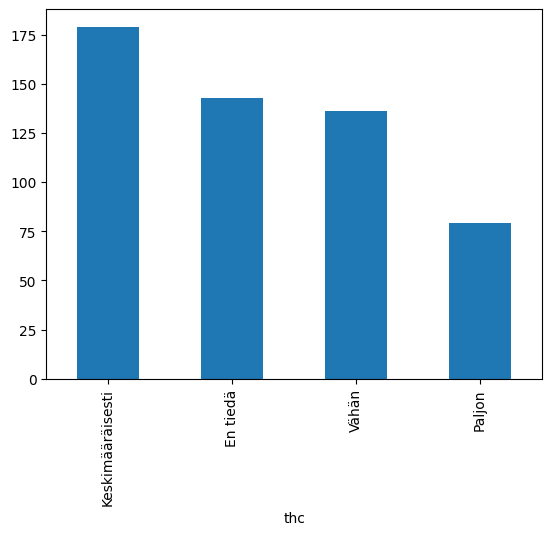

In [42]:
df['thc'].value_counts().plot(kind='bar')
print(df['thc'].value_counts())

thc_amount
Moderate         179
I do not know    143
Low              136
High              79
Name: count, dtype: int64


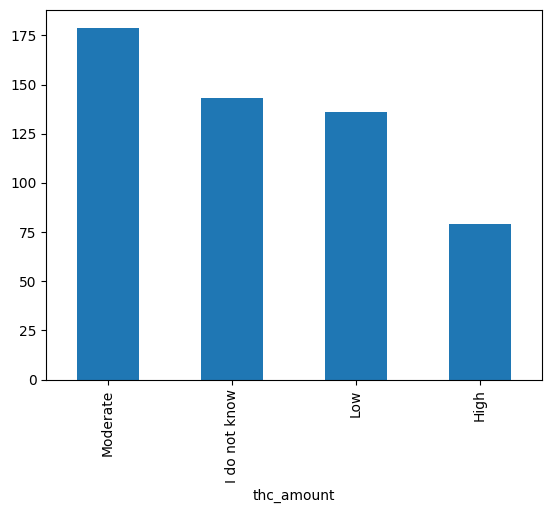

In [43]:
thc_mapping = {
    'Keskimääräisesti': 'Moderate',
    'En tiedä': 'I do not know',
    'Vähän': 'Low',
    'Paljon': 'High'
}

# Apply the mapping to the way_of_usage variable
df['thc_amount'] = df['thc'].map(thc_mapping)

df['thc_amount'].value_counts().plot(kind='bar')
print(df['thc_amount'].value_counts())

adjusted_thc_amount
Moderate    281
Low         171
High         85
Name: count, dtype: int64


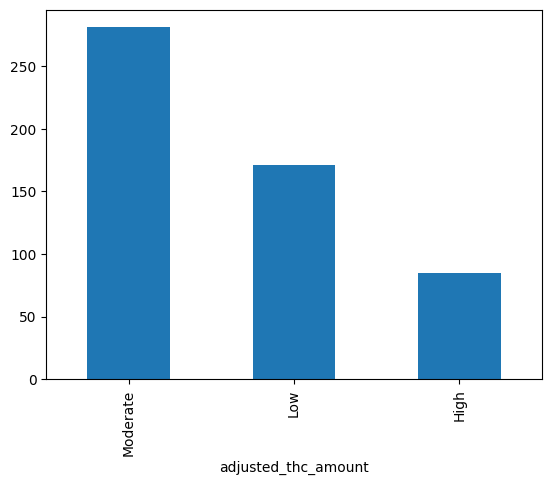

In [44]:
# 'thc_amount'
df = impute_unknown_with_mode(df, 'thc_amount', ['gender', 'outcome'])
# I thought gender and cannabis could be good grouping results :)
# BTW, cannabis in here is still four category


#  Plot the new column for one of the adjusted columns
df['adjusted_thc_amount'].value_counts().plot(kind='bar')
print(df['adjusted_thc_amount'].value_counts())

# CBD amount

- And how much CBD is in the cannabis product you use the most?

thc_cbd
Keskimääräisesti    229
Paljon              167
En tiedä            100
Vähän                41
Name: count, dtype: int64


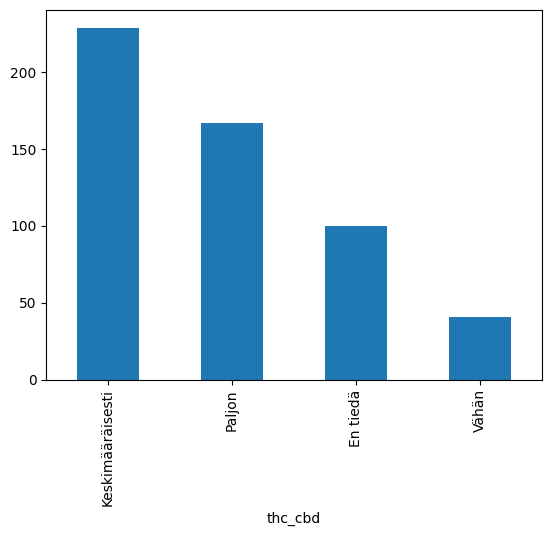

In [45]:
df.thc_cbd.value_counts(dropna=False).plot(kind='bar')
print(df.thc_cbd.value_counts(dropna=False))

thc_cbd
Moderate         229
High             167
I do not know    100
Low               41
Name: count, dtype: int64


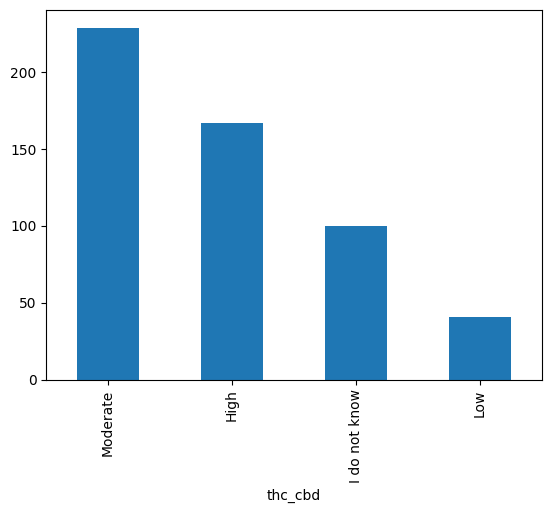

In [46]:
thc_mapping = {
    'Keskimääräisesti': 'Moderate',
    'En tiedä': 'I do not know',
    'Vähän': 'Low',
    'Paljon': 'High'
}

# Apply the mapping to the way_of_usage variable
df['thc_cbd'] = df['thc_cbd'].map(thc_mapping)

df['thc_cbd'].value_counts().plot(kind='bar')
print(df['thc_cbd'].value_counts())

In [47]:
# Step 1: Check for unique values in 'thc_cbd'
print(df['thc_cbd'].unique())

# Step 2: Ensure all the values in 'thc_cbd' are in thc_mapping
print(set(df['thc_cbd'].unique()) - set(thc_mapping.keys()))  # This will show you the values not covered by thc_mapping




['High' 'Moderate' 'I do not know' 'Low']
{'I do not know', 'High', 'Moderate', 'Low'}


adjusted_thc_cbd
Moderate    319
High        171
Low          47
Name: count, dtype: int64


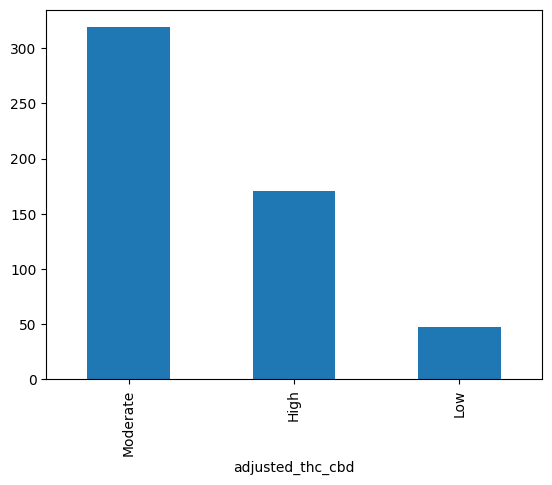

In [48]:
# apply to thc
df = impute_unknown_with_mode(df, 'thc_cbd', ['gender', 'outcome'])

# Step 5: Now plot and display the value counts
df['adjusted_thc_cbd'].value_counts().plot(kind='bar')
print(df['adjusted_thc_cbd'].value_counts())

# Correlation between THC and THC/CNB

Here I want to make sure whether these two concepts are too correlated, but there results are OK

In [49]:
# Ordinal encoding for categorical variables
ordinal_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'I do not know': 0 
}

df['thc_encoded'] = df['thc_amount'].map(ordinal_mapping)
df['thc_cbd_encoded'] = df['thc_cbd'].map(ordinal_mapping)

# Calculate the correlation between the encoded columns
correlation = df['thc_encoded'].corr(df['thc_cbd_encoded'])

# Print the correlation
print(f"The correlation between thc and thc_cnb (encoded) is: {correlation}")


The correlation between thc and thc_cnb (encoded) is: 0.39771217615663296


# Monthly Costs of Cannabis

monthly_cost
0.00       115
100.00      57
200.00      49
50.00       42
150.00      33
20.00       29
300.00      28
30.00       18
40.00       18
500.00      13
10.00       13
400.00      12
5.00        11
60.00       11
120.00       8
250.00       7
NaN          7
15.00        7
80.00        5
70.00        4
75.00        4
600.00       4
140.00       3
350.00       3
1000.00      2
2.00         2
90.00        2
25.00        2
320.00       2
8.00         2
230.00       2
1.00         2
240.00       2
180.00       2
280.00       1
67.00        1
1200.00      1
170.00       1
85.00        1
340.00       1
700.00       1
550.00       1
380.00       1
900.00       1
480.00       1
270.00       1
6.66         1
840.00       1
260.00       1
1500.00      1
Name: count, dtype: int64


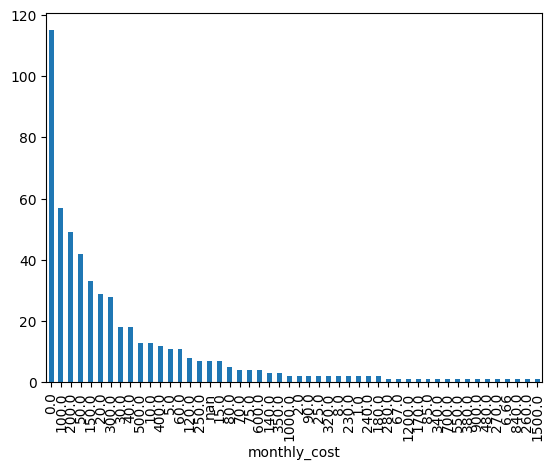

In [50]:
df.monthly_cost.value_counts(dropna=False).plot(kind='bar')
print(df.monthly_cost.value_counts(dropna=False))

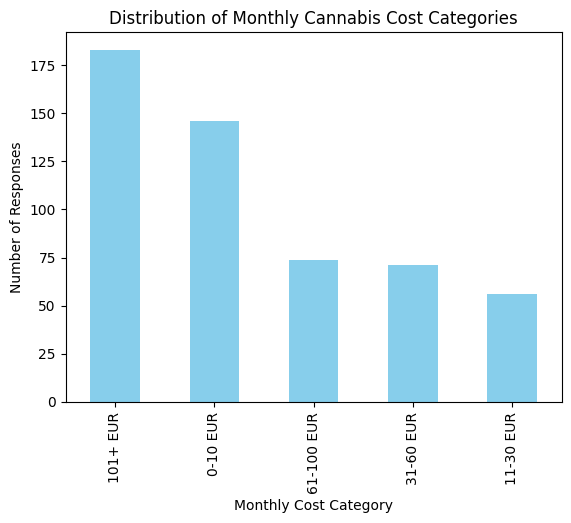

monthly_cost_category
101+ EUR      183
0-10 EUR      146
61-100 EUR     74
31-60 EUR      71
11-30 EUR      56
Name: count, dtype: int64


In [51]:
#    Very Low Cost: 0 - 10 EUR: Captures the lowest spenders.
#    Low Cost: 11 - 30 EUR: A slightly higher expenditure but still low.
#    Moderate Cost: 31 - 60 EUR: Mid-range spenders.
#    High Cost: 61 - 100 EUR: Higher expenditure.
#    Very High Cost: 101+ EUR: The highest spenders.


# Define the bins and labels for the categories
bins = [0, 10, 30, 60, 100, df['monthly_cost'].max()]
labels = ['0-10 EUR', '11-30 EUR', '31-60 EUR', 
          '61-100 EUR', '101+ EUR']

# Create a new column with monthly cost categories
df['monthly_cost_category'] = pd.cut(df['monthly_cost'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the distribution of the new categories
df['monthly_cost_category'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Monthly Cost Category')
plt.ylabel('Number of Responses')
plt.title('Distribution of Monthly Cannabis Cost Categories')
plt.show()

# Display the distribution in numbers
print(df['monthly_cost_category'].value_counts())


monthly_cost_ordinal
5    183
1    146
4     74
3     71
2     56
Name: count, dtype: int64


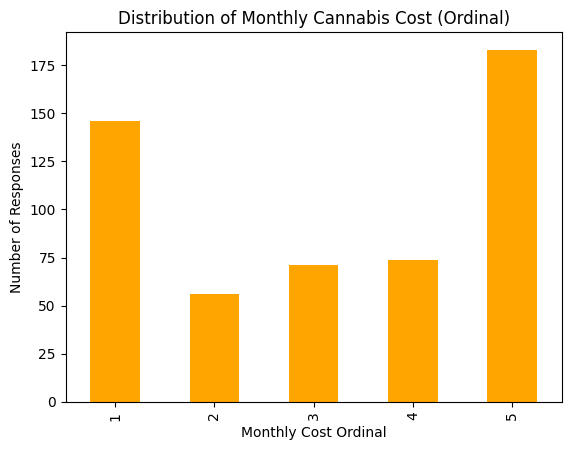

In [52]:
# Define the ordinal mapping based on the monthly cost categories
ordinal_mapping = {
    '0-10 EUR': 1,
    '11-30 EUR': 2,
    '31-60 EUR': 3,
    '61-100 EUR': 4,
    '101+ EUR': 5
}

# Apply the ordinal mapping to create the monthly_cost_ordinal variable
df['monthly_cost_ordinal'] = df['monthly_cost_category'].map(ordinal_mapping)

# Display the distribution in numbers
print(df['monthly_cost_ordinal'].value_counts())

# Optionally, plot the distribution of the monthly_cost_ordinal
df['monthly_cost_ordinal'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Monthly Cost Ordinal')
plt.ylabel('Number of Responses')
plt.title('Distribution of Monthly Cannabis Cost (Ordinal)')
plt.show()


# Economic Worry

economic_worry
Ei lainkaan       298
Vähän             116
Jonkin verran      80
Paljon             31
Todella paljon     12
Name: count, dtype: int64


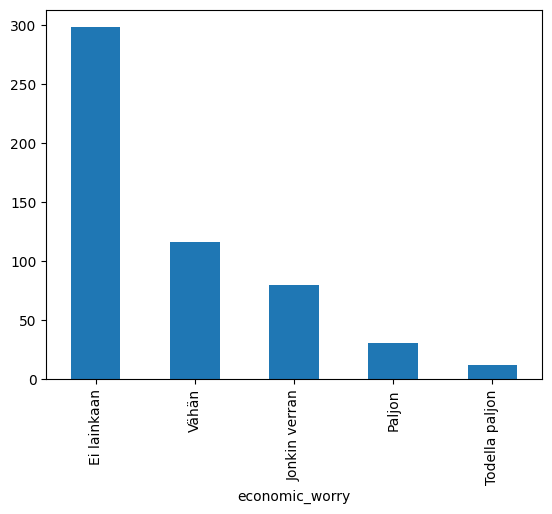

In [53]:
df.economic_worry.value_counts(dropna=False).plot(kind='bar')
print(df.economic_worry.value_counts(dropna=False))

economic_worry_translated
None         298
Little       116
Somewhat      80
Much          31
Very_much     12
Name: count, dtype: int64


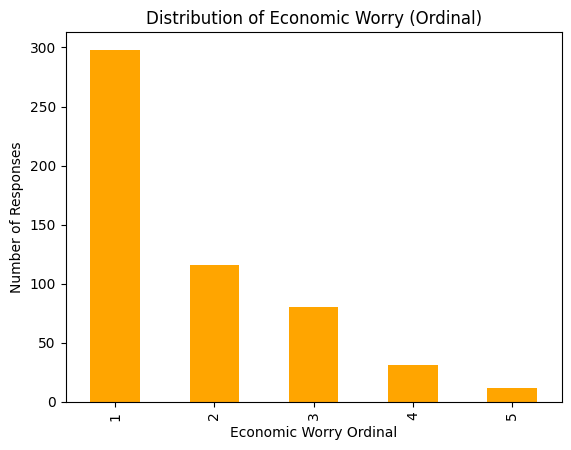

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the mapping for economic_worry with translations
economic_worry_mapping = {
    'Ei lainkaan': 'None',
    'Vähän': 'Little',
    'Jonkin verran': 'Somewhat',
    'Paljon': 'Much',
    'Todella paljon': 'Very_much'
}

# Apply the mapping to the economic_worry column
df['economic_worry_translated'] = df['economic_worry'].map(economic_worry_mapping)

# Define the ordinal mapping for the economic worry categories
economic_worry_ordinal_mapping = {
    'None': 1,
    'Little': 2,
    'Somewhat': 3,
    'Much': 4,
    'Very_much': 5
}

# Apply the ordinal mapping to create the economic_worry_ordinal variable
df['economic_worry_ordinal'] = df['economic_worry_translated'].map(economic_worry_ordinal_mapping)

# Display the first few rows to verify
print(df.economic_worry_translated.value_counts(dropna=False))

# Plot the distribution of the economic_worry_ordinal
df['economic_worry_ordinal'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Economic Worry Ordinal')
plt.ylabel('Number of Responses')
plt.title('Distribution of Economic Worry (Ordinal)')
plt.show()


amount
0,1 - 0,5           247
0,6 - 1,0           132
1,1 - 1,5            53
Alle 0,1 grammaa     37
1,6 - 2,0            30
Yli 3 grammaa        16
2,1 - 2,5            12
2,6 - 3,0            10
Name: count, dtype: int64


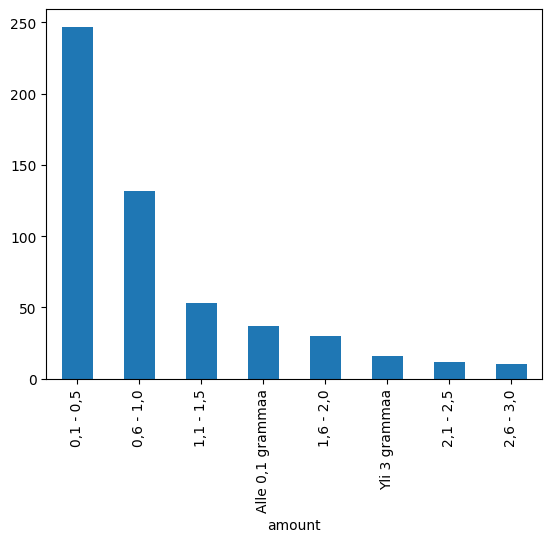

In [55]:
df.amount.value_counts(dropna=False).plot(kind='bar')
print(df.amount.value_counts(dropna=False))

# Severity of Cannabis Use

anxious
Joskus                                           235
Ei koskaan tai erittäin harvoin                  234
Usein                                             40
Aina tai melkein aina                             14
En osaa sanoa                                      8
En ole käyttänyt viimeisen 3 kuukauden aikana      6
Name: count, dtype: int64
0                             Joskus
1    Ei koskaan tai erittäin harvoin
2                             Joskus
3                             Joskus
4                              Usein
5                             Joskus
6                             Joskus
7                             Joskus
8    Ei koskaan tai erittäin harvoin
9                             Joskus
Name: anxious, dtype: object


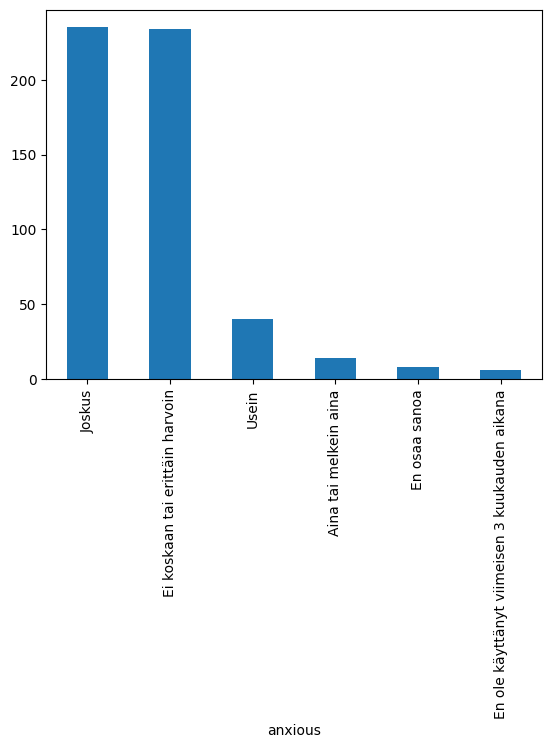

In [56]:
df.anxious.value_counts(dropna=False).plot(kind='bar')
print(df.anxious.value_counts(dropna=False))
print(df.anxious.head(10))


# 
severity_mapping_anxious = {
    'Ei koskaan tai erittäin harvoin': 0,# this one is different
    'Joskus': 1,
    'Usein': 2,
    'Aina tai melkein aina': 3,
    'En osaa sanoa': 0,
    'En ole käyttänyt viimeisen 3 kuukauden aikana': 0,
    'En halua vastata': 0
}

anxiety
En koskaan tai erittäin harvoin                  328
Joskus                                           158
Usein                                             21
En ole käyttänyt viimeisen 3 kuukauden aikana     14
Aina tai melkein aina                              8
En osaa sanoa                                      7
En halua vastata                                   1
Name: count, dtype: int64
0    En koskaan tai erittäin harvoin
1    En koskaan tai erittäin harvoin
2    En koskaan tai erittäin harvoin
3    En koskaan tai erittäin harvoin
4                             Joskus
Name: anxiety, dtype: object


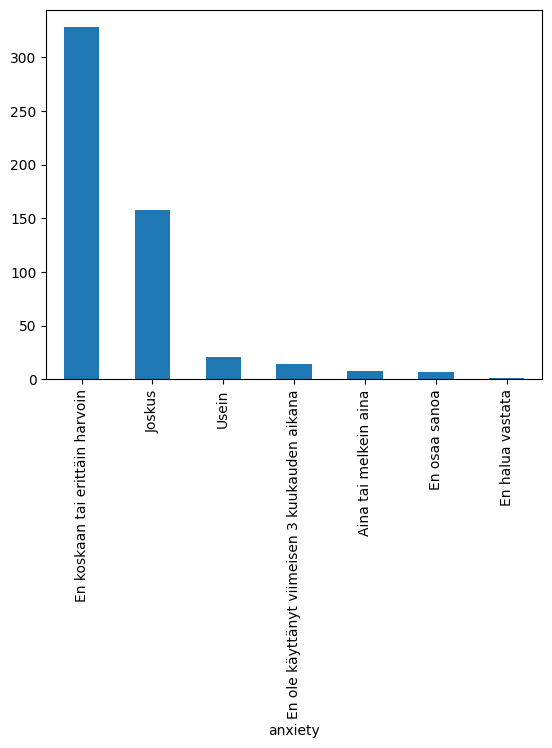

In [57]:
df.anxiety.value_counts(dropna=False).plot(kind='bar')
print(df.anxiety.value_counts(dropna=False))
print(df.anxiety.head())

concern
En koskaan tai erittäin harvoin                  331
Joskus                                           174
Usein                                             18
En ole käyttänyt viimeisen 3 kuukauden aikana      6
En osaa sanoa                                      5
En halua vastata                                   2
Aina tai melkein aina                              1
Name: count, dtype: int64


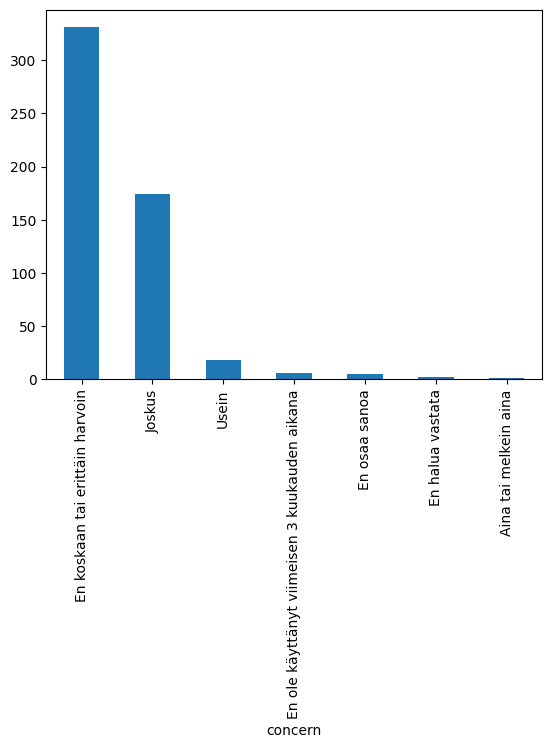

In [58]:
df.concern.value_counts(dropna=False).plot(kind='bar')
print(df.concern.value_counts(dropna=False))

want_to_stop
En koskaan tai erittäin harvoin                  380
Joskus                                           117
En osaa sanoa                                     14
Usein                                             12
En ole käyttänyt viimeisen 3 kuukauden aikana     10
Aina tai melkein aina                              4
Name: count, dtype: int64


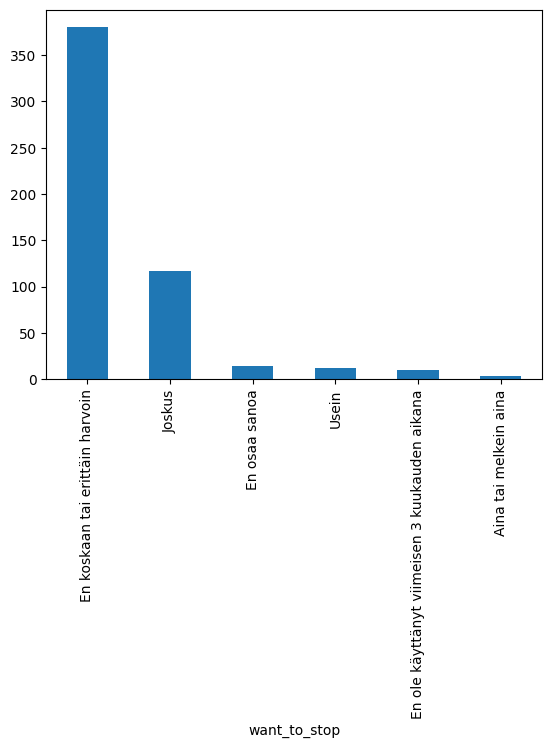

In [59]:
df.want_to_stop.value_counts(dropna=False).plot(kind='bar')
print(df.want_to_stop.value_counts(dropna=False))

In [60]:
#0=Never/almost never (En koskaan tai erittäin harvoin)
#1=sometimes (Joskus)
#2=often (Usein)
#3=always/nearly always (Aina tai melkein aina)


severity_mapping = {
    'En koskaan tai erittäin harvoin': 0,
    'Joskus': 1,
    'Usein': 2,
    'Aina tai melkein aina': 3,
    'En osaa sanoa': 0,
    'En ole käyttänyt viimeisen 3 kuukauden aikana': 0,
    'En halua vastata': 0
}



df['anxious_score'] = df['anxious'].map(severity_mapping_anxious)
df['anxiety_score'] = df['anxiety'].map(severity_mapping)
df['concern_score'] = df['concern'].map(severity_mapping)
df['want_to_stop_score'] = df['want_to_stop'].map(severity_mapping)

In [61]:
# Create the severity variable by summing the scores
df['severity'] = df[['anxious_score', 'anxiety_score', 'concern_score', 'want_to_stop_score']].sum(axis=1)


In [62]:
missing_values_table(df[['anxious_score', 'anxiety_score', 'concern_score', 'want_to_stop_score', 'severity']])

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [63]:
# Assuming the severity mapping is already applied to the columns as shown

# Display the first few rows of the relevant columns
print(df[['anxious_score', 'anxiety_score', 'concern_score', 'want_to_stop_score', 'severity']].head(20))



    anxious_score  anxiety_score  concern_score  want_to_stop_score  severity
0               1              0              1                   1         3
1               0              0              0                   0         0
2               1              0              1                   0         2
3               1              0              0                   0         1
4               2              1              1                   1         5
5               1              1              1                   0         3
6               1              1              1                   1         4
7               1              0              0                   0         1
8               0              0              0                   0         0
9               1              0              0                   0         1
10              1              0              0                   0         1
11              1              0              0                 

In [64]:
from scipy.stats import pearsonr
import numpy as np

# Calculate Cronbach's alpha
def cronbach_alpha(df):
    items = df[['anxious_score', 'anxiety_score', 'concern_score', 'want_to_stop_score']]
    item_vars = items.var(axis=0, ddof=1)
    total_var = items.sum(axis=1).var(ddof=1)
    n_items = items.shape[1]
    alpha = n_items / (n_items - 1) * (1 - item_vars.sum() / total_var)
    return alpha

alpha = cronbach_alpha(df)
print(f"Cronbach's Alpha: {alpha:.2f}")


Cronbach's Alpha: 0.74


In [65]:
# additional varification of Cronbach's alpha 
import pingouin as pg

# List of the score columns to include in the Cronbach's alpha calculation
risk_list = ['anxious_score', 'anxiety_score', 'concern_score', 'want_to_stop_score']

# Calculate Cronbach's alpha for the new variables
alpha_regular = pg.cronbach_alpha(df[risk_list])

print(f"Cronbach's Alpha: {alpha_regular[0]:.2f}")


Cronbach's Alpha: 0.74


In [66]:
df.severity.describe()

count    537.000000
mean       1.763501
std        1.873303
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       11.000000
Name: severity, dtype: float64

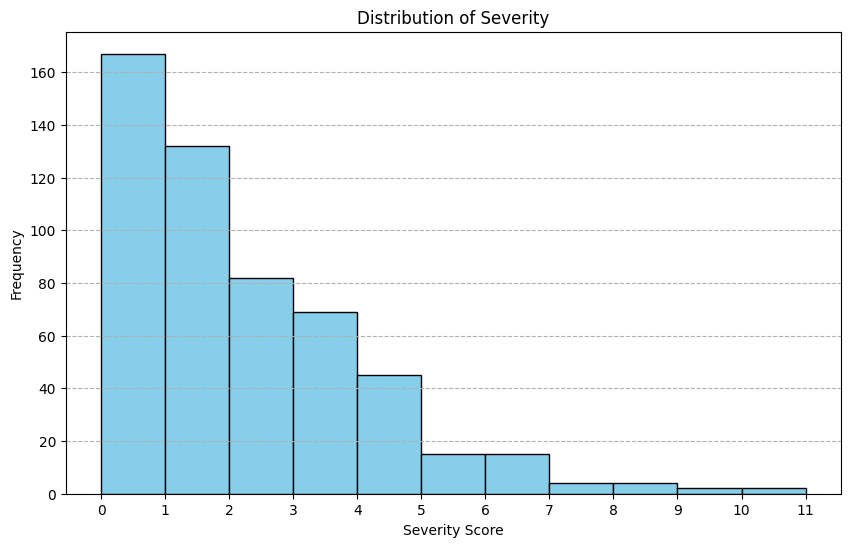

In [67]:
import matplotlib.pyplot as plt

# Plot the distribution of the severity variable
plt.figure(figsize=(10, 6))
plt.hist(df['severity'], bins=range(df['severity'].min(), df['severity'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Severity')
plt.xlabel('Severity Score')
plt.ylabel('Frequency')
plt.xticks(range(df['severity'].min(), df['severity'].max() + 1))  # Ensure all severity scores are shown
plt.grid(axis='y', linestyle='--')
plt.show()


## Dependent variable

outcome
Käytän kannabista useimmiten itse-lääkinnällisiin tarkoituksiin ja toisinaan viihdetarkoituksessa    301
Käytän kannabista toisinaan itse-lääkinnällisiin tarkoituksiin ja useimmiten viihdetarkoituksessa    136
Käytän kannabista ainoastaan itse-lääkinnällisiin tarkoituksiin                                       79
Käytän kannabista ainoastaan viihdetarkoituksessa (esim. nautinto)                                    21
Name: count, dtype: int64


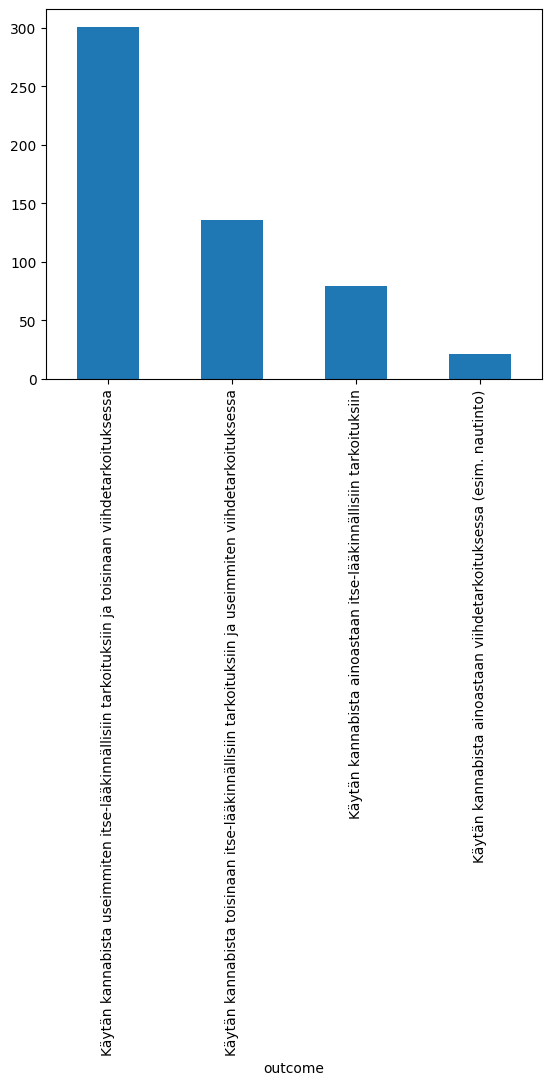

In [68]:
df.outcome.value_counts(dropna=False).plot(kind='bar')
print(df.outcome.value_counts(dropna=False))

In [69]:
df['cannabis'] = df['outcome'].map({
    'Käytän kannabista ainoastaan viihdetarkoituksessa (esim. nautinto)': '0',
    'Käytän kannabista toisinaan itse-lääkinnällisiin tarkoituksiin ja useimmiten viihdetarkoituksessa': '0',
    'Käytän kannabista useimmiten itse-lääkinnällisiin tarkoituksiin ja toisinaan viihdetarkoituksessa': '1',
    'Käytän kannabista ainoastaan itse-lääkinnällisiin tarkoituksiin': '1'
})


cannabis
1    380
0    157
Name: count, dtype: int64


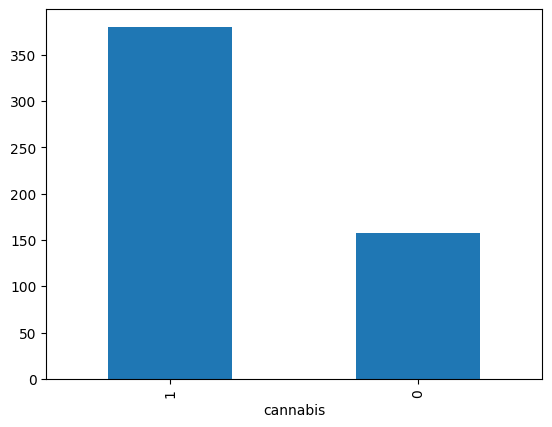

In [70]:
df.cannabis.value_counts().plot(kind='bar')
print(df.cannabis.value_counts(dropna=False))

# Final Selection

In [71]:
selected_variables = ['gender', 'age','education_level','city_ordinal', 'onset','employment', 'employment2',
                       'monthly_usage','amount_ordinal','usage_type', 'adjusted_thc_amount', 'adjusted_thc_cbd','severity','cannabis']

# Create a new DataFrame with only the selected columns
new_df = df[selected_variables]

# Display the new DataFrame
new_df.head()

,gender,age,education_level,city_ordinal,onset,employment,employment2,monthly_usage,amount_ordinal,usage_type,adjusted_thc_amount,adjusted_thc_cbd,severity,cannabis
0,M,47,3,4,14,Other,Not in paid employment,20.0,3,Smoke_with_tobacco,Moderate,High,3,1
1,M,19,2,1,15,Full-time,Employed,30.0,3,Smoke_pure,High,High,0,0
2,F+ others,36,2,1,20,Part-time,Employed,15.0,7,Smoke_with_tobacco,Low,Moderate,2,1
3,M,38,2,3,14,Full-time,Employed,30.0,5,Vaporize_flower,Low,High,1,1
4,M,38,2,3,19,Part-time,Employed,29.0,3,Smoke_pure,Moderate,High,5,1


In [72]:
missing_values_table(new_df)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [73]:
new_df.to_csv('../data/nested_model.csv')